In [1]:
# PyTorch
import torch
from torch import optim
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader, random_split

# Numpy
import numpy as np

# Plot
import matplotlib.pyplot as plt

# User-Defined Class
from model import sin_ml, sin_qml
from trainer import trainer

### Data 생성

In [2]:
# 데이터 생성
num_data = 20000  # 총 데이터 개수
batch_size = 128  # 배치 크기

# 입력 데이터 생성 (0부터 2π 사이의 값)
x_data = torch.rand(num_data, 1) * 2 * torch.pi  # (20000, 1) shape로 생성
y_data = torch.sin(x_data)  # sin 함수로 출력 생성 (20000, 1)

# 텐서 데이터셋 생성
dataset = TensorDataset(x_data, y_data)

# Train/Test set 분할 (80%/20% 비율)
train_size = int(0.8 * num_data)
test_size = num_data - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 배치 예시 출력
x_batch, y_batch = next(iter(train_loader))
print("Example batch x:", x_batch.shape)  # Expected: [128, 1]
print("Example batch y:", y_batch.shape)  # Expected: [128, 1]


Example batch x: torch.Size([128, 1])
Example batch y: torch.Size([128, 1])


### ML model 선언

In [3]:
model1 = sin_ml(hidden_dim=4, num_layer=3)
trainer1 = trainer(model1, train_loader=train_loader, test_loader=train_loader)

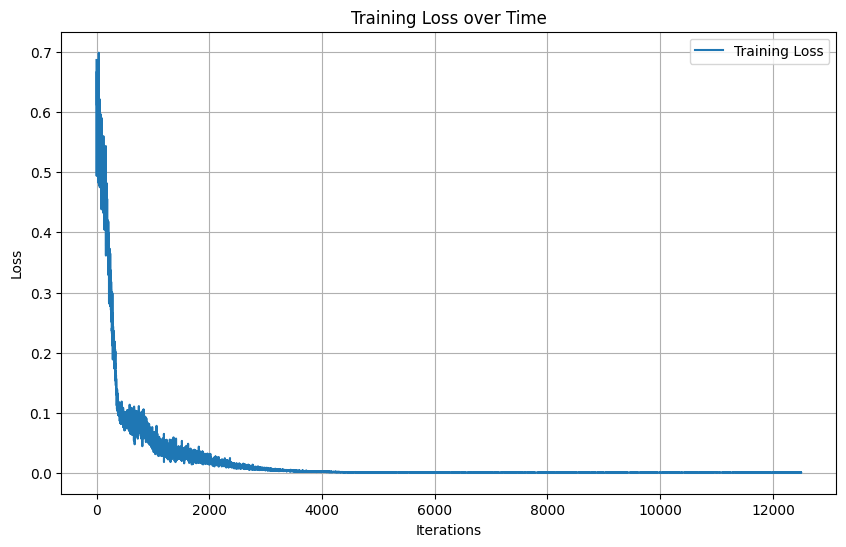

In [4]:
trainer1.train(100, True)

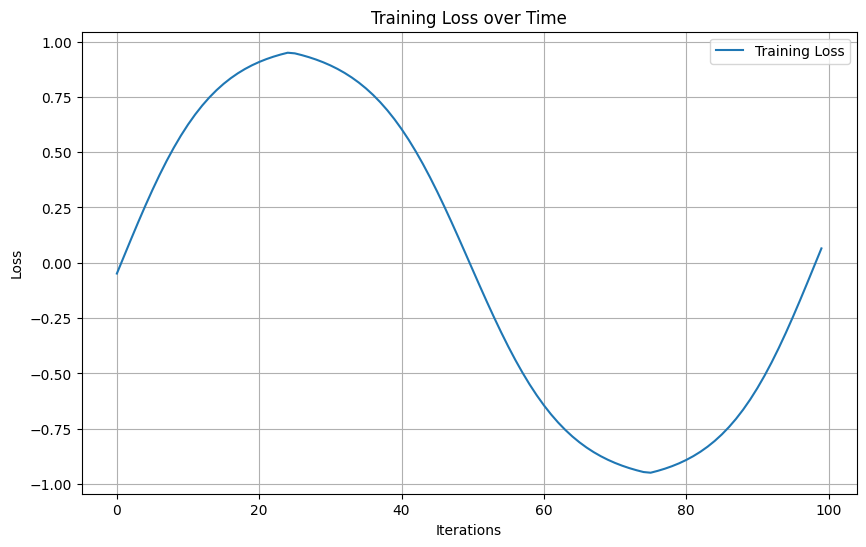

In [5]:
trainer1.plot_pred()

### QML Model 선언

In [3]:
model2 = sin_qml(num_qubit=2, num_layer=1)
trainer2 = trainer(model2, train_loader=train_loader, test_loader=train_loader)

In [4]:
temp_data = torch.rand(16, 1)

before enc_theta shape : torch.Size([16, 4])
after enc_theta shape : torch.Size([4, 16])
before output reshape : torch.Size([16])
after output reshape : torch.Size([16, 1])


tensor([[ 0.0492],
        [-0.3570],
        [-0.6757],
        [ 0.5709],
        [-0.2233],
        [-0.1267],
        [-0.2489],
        [ 0.2590],
        [ 0.0256],
        [-0.3456],
        [-0.7446],
        [ 0.5891],
        [ 0.0712],
        [-0.3769],
        [-0.7278],
        [ 0.6045]], dtype=torch.float64, grad_fn=<ViewBackward0>)

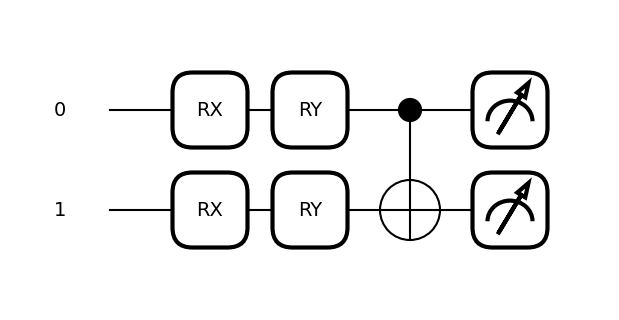

In [5]:
result = model2(temp_data)
result

In [6]:
for x, y in train_loader:
    print(y)
    print(y.shape)
    break

tensor([[-0.3699],
        [-0.8876],
        [-0.5201],
        [-0.1915],
        [-0.9391],
        [ 0.8290],
        [-0.9567],
        [ 0.6460],
        [-0.9322],
        [-0.8262],
        [ 0.8543],
        [ 0.9482],
        [ 0.5252],
        [ 0.4933],
        [ 0.6119],
        [-0.6493],
        [-0.1795],
        [-0.9330],
        [ 0.4451],
        [ 0.8756],
        [-0.9968],
        [ 0.3648],
        [ 0.6987],
        [-0.1855],
        [-0.5113],
        [-0.9865],
        [ 0.4416],
        [-0.5323],
        [-0.9111],
        [-0.5258],
        [ 0.6467],
        [ 0.9875],
        [ 0.8544],
        [ 0.9669],
        [-0.2942],
        [ 0.5804],
        [-0.9252],
        [-0.3310],
        [-0.6653],
        [ 0.3036],
        [-0.9999],
        [-0.9706],
        [ 0.5959],
        [-0.7689],
        [ 0.9197],
        [ 0.6192],
        [ 0.6122],
        [-0.5912],
        [ 0.6754],
        [-0.4108],
        [-0.2952],
        [ 0.6714],
        [-0.

before enc_theta shape : torch.Size([128, 4])
after enc_theta shape : torch.Size([4, 128])
before output reshape : torch.Size([128])
after output reshape : torch.Size([128, 1])


RuntimeError: Found dtype Float but expected Double

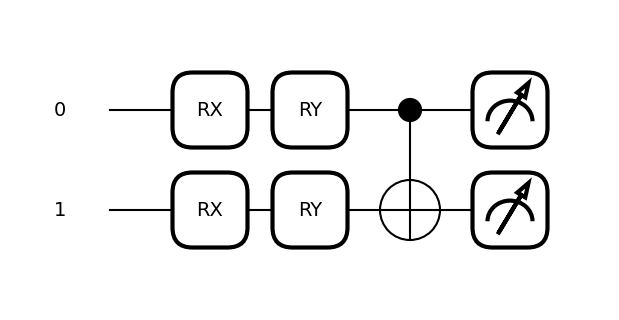

In [7]:
trainer2.train(100)